In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("customer_features_complete.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (1986574, 107)


,customer_id,total_orders,unique_products,total_quantity,avg_quantity_per_order,quantity_std,total_revenue,avg_revenue_per_order,revenue_std,min_order_revenue,max_order_revenue,total_profit,avg_profit_per_order,total_discount,avg_discount,max_discount_used,avg_price_point,price_std,min_price_paid,max_price_paid,first_purchase,last_purchase,active_days,unique_cities,customer_lifetime_days,recency_days,recency,frequency,monetary,orders_last_30d,revenue_last_30d,items_last_30d,orders_last_60d,revenue_last_60d,items_last_60d,orders_last_90d,revenue_last_90d,items_last_90d,avg_days_between_orders,std_days_between_orders,min_days_between_orders,max_days_between_orders,unique_brands,unique_l0_categories,unique_l1_categories,unique_l2_categories,top_brand_1,top_brand_2,top_brand_3,top_category_1,top_category_2,top_category_3,top_product_1,top_product_2,top_product_3,brand_loyalty_score,category_focus_score,product_repeat_rate,profit_margin,discount_ratio,price_segment,no_discount_purchase_pct,small_discount_pct,medium_discount_pct,high_discount_pct,avg_discount_needed,discount_sensitivity,avg_categories_per_order,max_categories_per_order,avg_brands_per_order,max_brands_per_order,avg_products_per_order,max_products_per_order,avg_items_per_order,max_items_per_order,single_category_orders_pct,multi_category_orders_pct,bulk_orders_pct,top_price_range_1,top_price_range_2,top_price_range_3,price_variance,price_cv,purchase_velocity,purchase_trend,revenue_trend,recency_score,frequency_score,monetary_score,rfm_score,rfm_segment_code,clv_predicted,product_diversity_score,bargain_hunter_score,premium_buyer_score,engagement_score,is_churned,churn_risk_score,churn_risk_category,showing_decline,at_risk,is_one_time_buyer,is_frequent_buyer,is_high_value,is_discount_dependent,is_active,customer_segment
0,189,32,93,208,1.41,1.07,22627.00,152.89,192.53,11.00,1199.00,3640.46,24.60,0.00,0.00,0.00,119.15,150.57,11.00,1199.00,2022-04-04,2022-07-06,28,1,93,4,4,32,22627.00,8.00,3264.00,42.00,14.00,6085.00,80.00,29.00,19666.00,187.00,3.00,3.48,0.00,14.00,43,13,36,39,Unknown,Polka Pop,epigamia,Fresh Vegetables,Exotics,Fresh Fruits,483961.00,470636.00,477795.00,41.22,13.51,29.03,16.09,0.00,mid_range,100.00,0.00,0.00,0.00,0.00,0.00,3.34,9,3.00,9,4.62,15,6.50,16,25.00,75.00,9.38,50-100,0-50,100-250,22672.81,1.26,0.34,-1,-1,4,5,5,14,455,87860.16,2.91,0,30,70,0,0.07,low_risk,0,0,0,1,1,0,1,Champions
1,224,1,6,7,1.17,0.41,331.00,55.17,34.07,20.00,114.00,33.79,5.63,0.00,0.00,0.00,48.83,32.93,20.00,114.00,2022-06-14,2022-06-14,1,1,0,26,26,1,331.00,1.00,331.00,7.00,1.00,331.00,7.00,1.00,331.00,7.00,999.00,0.00,0.00,0.00,5,3,4,5,Lay's,Cadbury Dairy Milk,Unknown,Chips & Crisps,Chocolate Packs,Unknown,17678.00,542.00,-1.00,33.33,50.00,0.00,10.21,0.00,budget,100.00,0.00,0.00,0.00,0.00,0.00,4.00,4,5.00,5,6.00,6,7.00,7,0.00,100.00,0.00,0-50,100-250,50-100,1084.57,0.67,1.00,0,1,3,1,2,6,312,120815.00,6.00,30,30,50,0,0.43,medium_risk,0,0,1,0,0,0,1,New
2,234,91,230,686,1.37,0.67,51331.00,102.25,165.36,0.00,2798.00,8374.36,16.68,0.00,0.00,0.00,81.98,151.46,0.00,2798.00,2022-04-02,2022-07-10,59,1,99,0,0,91,51331.00,17.00,8336.00,135.00,47.00,22571.00,325.00,85.00,44076.00,612.00,1.10,1.85,0.00,12.00,75,17,62,83,Unknown,GMC,Mother Dairy,Fresh Vegetables,Fresh Fruits,Curd & Yogurt,445675.00,192.00,333785.00,44.42,30.68,36.52,16.31,0.00,mid_range,100.00,0.00,0.00,0.00,0.00,0.00,3.64,16,3.03,11,5.52,22,7.54,29,17.58,82.42,21.98,0-50,50-100,100-250,22939.34,1.85,0.91,-1,-1,5,5,5,15,555,187358.15,2.53,30,30,70,0,0.00,low_risk,0,0,0,1,1,0,1,Champions
3,249,13,36,83,2.02,1.44,4696.00,114.54,61.73,23.00,250.00,714.90,17.44,0.00,0.00,0.00,73.02,51.37,19.00,225.00,2022-04-14,2022-06-03,10,1,50,37,37,13,4696.00,0.00,0.00,0.00,9.00,3015.00,43.00,13.00,4696.00,83.00,4.17,6.83,0.00,23.00,25,8,18,23,Haldiram's,Nestle a+,Catch,Chips & Crisps,Soft Drinks,Curd & Yogurt,10554.00,316.00,127891.00,9.76,14.63,13.89,15.22,0.00,mid_range,100.00,0.00,0.00,0.00,0.00,0.00,2.31,6,2.69,7,3.15,10,6.38,21,46.15,53

In [79]:
dtype_summary = pd.DataFrame({
    "Feature": df.columns,
    "DataType": df.dtypes.values
})
dtype_summary

,Feature,DataType
0,customer_id,int64
1,total_orders,int64
2,unique_products,int64
3,total_quantity,int64
4,avg_quantity_per_order,float64
...,...,...
102,is_frequent_buyer,int64
103,is_high_value,int64
104,is_discount_dependent,int64
105,is_active,int64


In [80]:
numeric_summary = df.describe().T[['min', 'max', 'mean', 'std']].reset_index()
numeric_summary.rename(columns={'index':'Feature'}, inplace=True)
numeric_summary

,Feature,min,max,mean,std
0,customer_id,189.00,21151976.00,13252892.01,6540830.93
1,total_orders,1.00,409.00,5.25,8.02
2,unique_products,1.00,451.00,18.06,25.14
3,total_quantity,1.00,5378.00,30.25,54.12
4,avg_quantity_per_order,1.00,50.00,1.36,0.98
5,quantity_std,0.00,34.65,0.46,0.72
6,total_revenue,-568.00,448457.00,2364.03,4100.70
7,avg_revenue_per_order,-165.00,20150.00,125.71,124.50
8,revenue_std,0.00,7331.99,81.91,92.54
9,min_order_revenue,-600.00,19900.00,56.24,113.79


In [82]:
categorical_summary = {}
for col in df.select_dtypes(exclude='number').columns:
    categorical_summary[col] = df[col].value_counts().head(5)

categorical_summary


{'first_purchase': first_purchase
 2022-04-01    95343
 2022-04-02    85390
 2022-04-03    75623
 2022-04-04    54817
 2022-04-05    49648
 Name: count, dtype: int64,
 'last_purchase': last_purchase
 2022-07-10    142165
 2022-07-09    108397
 2022-07-08     81599
 2022-07-07     72240
 2022-07-06     64434
 Name: count, dtype: int64,
 'top_brand_1': top_brand_1
 Unknown       669055
 Amul          197701
 GMC            89374
 Fortune        64225
 Aashirvaad     53999
 Name: count, dtype: int64,
 'top_brand_2': top_brand_2
 Unknown         788363
 Amul            238815
 GMC              76116
 Mother Dairy     54909
 Fortune          33745
 Name: count, dtype: int64,
 'top_brand_3': top_brand_3
 Unknown         1212365
 Amul             118984
 GMC               37793
 Aashirvaad        35268
 Mother Dairy      32049
 Name: count, dtype: int64,
 'top_category_1': top_category_1
 Fresh Vegetables    451888
 Chips & Crisps      172167
 Atta                 79946
 Fresh Fruits         

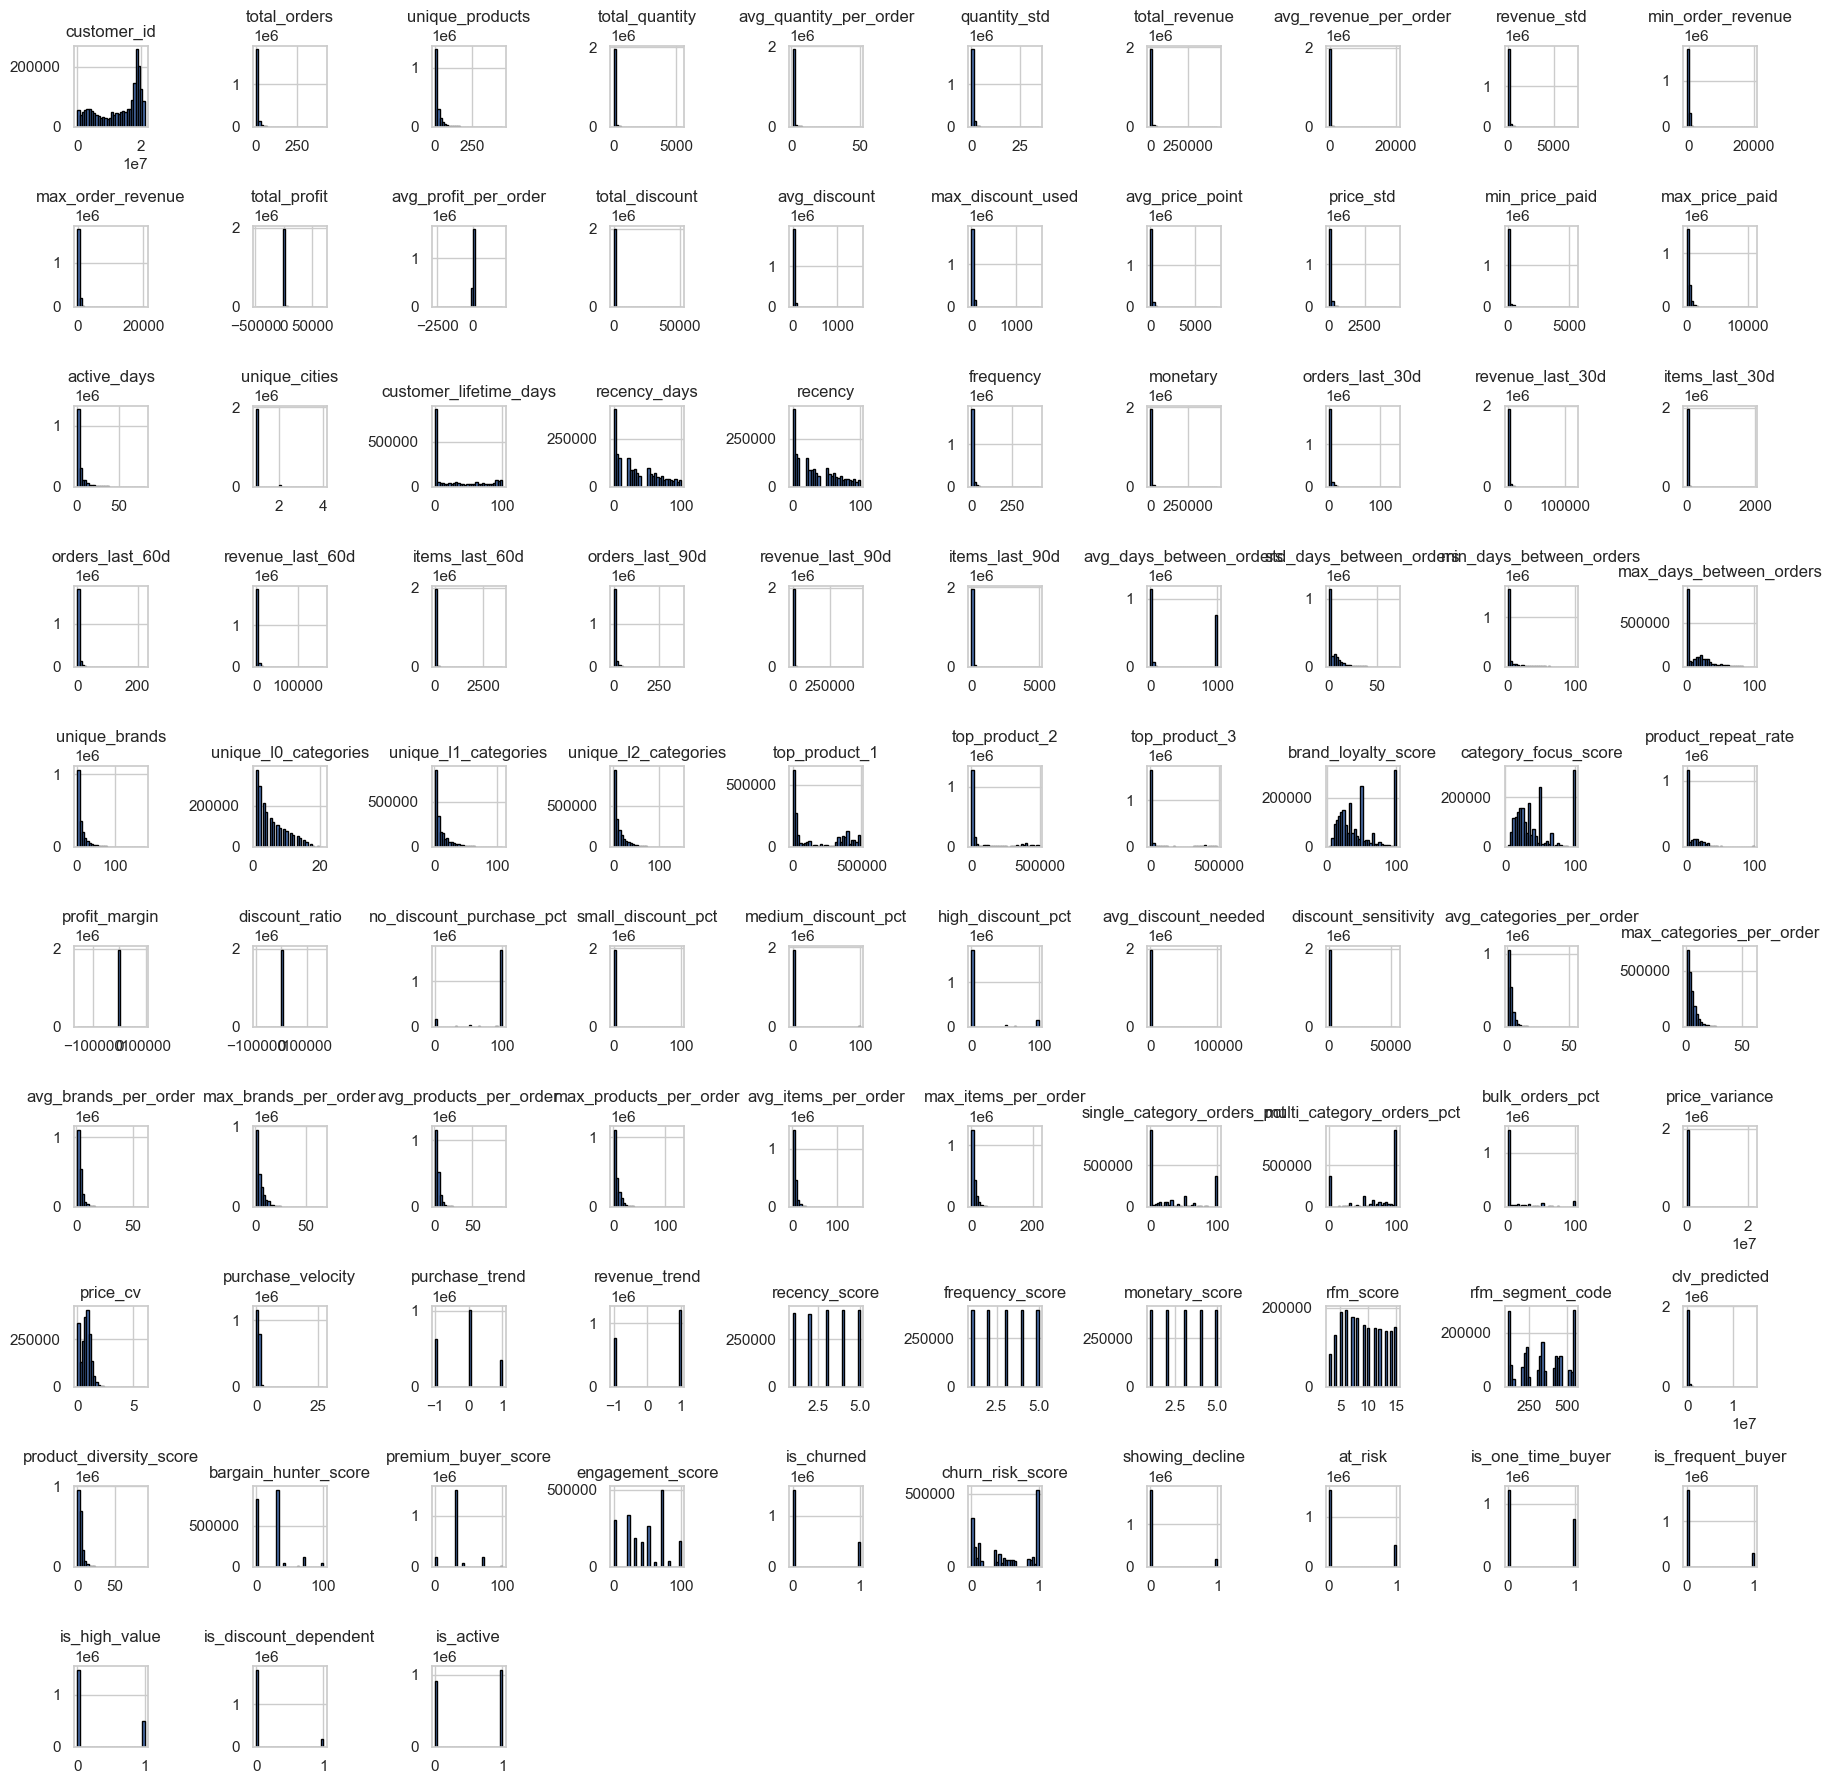

In [85]:
df.hist(figsize=(18, 18), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()